In [1]:
## Importing shapefile to read the shapefile files
import shapefile
# Other imports 
import time
from time import sleep
import simpledbf 
from simpledbf import Dbf5
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import matplotlib as mpl

SQLalchemy is not installed. No support for SQL output.


In [2]:
# Read in all the shapes for file perimeters from December 2020
shape = shapefile.Reader("./../data/Global Fire Example/MODIS_BA_GLOBAL_1_12_2020.shp")
shapeRecords = shape.shapeRecords()

In [3]:
# Load in the first feature for demonstration
feature1 = shapeRecords[0]

#### For objects of type ShapeFile(), they have two childs (.record and .shape) Both will be demonstrated here

In [4]:
# record returns all of the data associated with perimter other than the shape
feature1.record

Record #-1: [datetime.date(2020, 6, 30), 'ActiveArea', 23423319, datetime.date(2020, 6, 30)]

In [5]:
# shape returns the Shape Object
feature1.shape

In [6]:
# shape.points returns the indices of the polygon
feature1.shape.points

[(38.57946501973953, -13.470833332172333),
 (38.58363168640582, -13.470833332172333),
 (38.58363168640582, -13.47916666550492),
 (38.57946501973953, -13.47916666550492),
 (38.57946501973953, -13.470833332172333)]

In [7]:
# shape.shapeType returns the number of sides of the polygon
feature1.shape.shapeType

5

In [8]:
# shape.shapeName returns the path of the shape file
shape.shapeName

'./../data/Global Fire Example/MODIS_BA_GLOBAL_1_12_2020'

In [11]:
dbf = Dbf5('./../data/Global Fire Example/MODIS_BA_GLOBAL_1_12_2020.dbf')
df = dbf.to_dataframe()

In [12]:
# Get data for just one fire
ID_23423319_df = df.loc[df['Id'] == 23423319]

In [13]:
# sort by date
ID_23423319_sorted_df = ID_23423319_df
ID_23423319_sorted_df = ID_23423319_sorted_df.sort_values(by='IDate')

2020-11-20
2020-06-13
2020-06-14


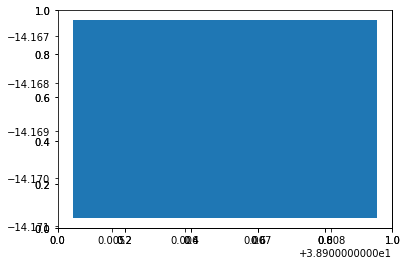

2020-06-15


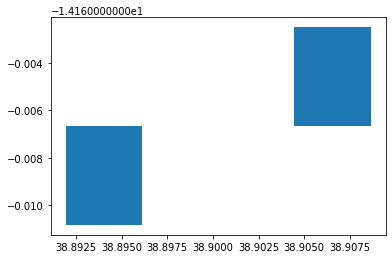

2020-06-16


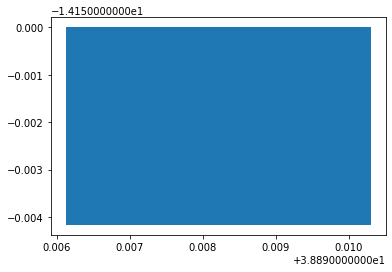

2020-06-18


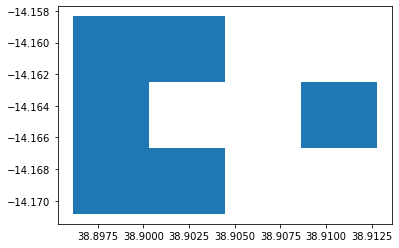

2020-06-19


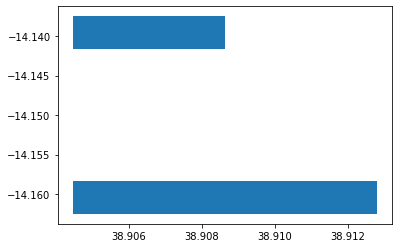

2020-06-20


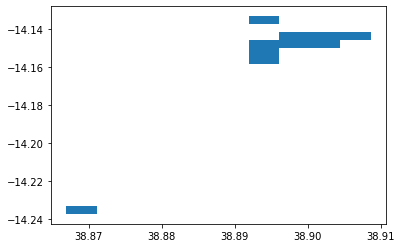

2020-06-21


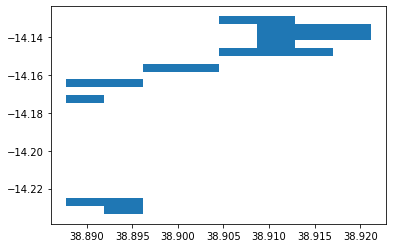

2020-06-22


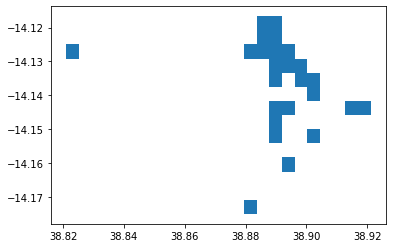

2020-06-23


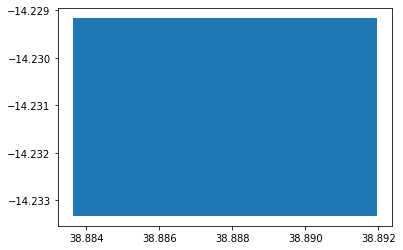

2020-06-24


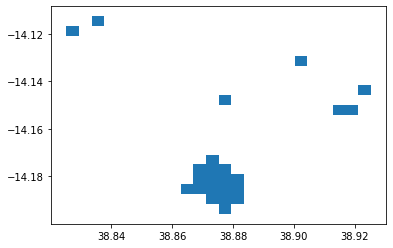

2020-06-25


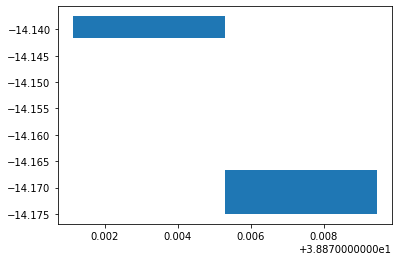

2020-06-26


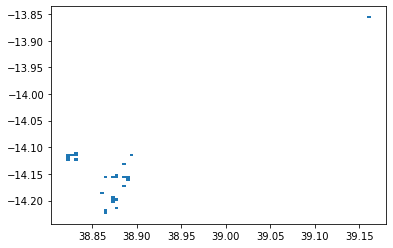

2020-06-27


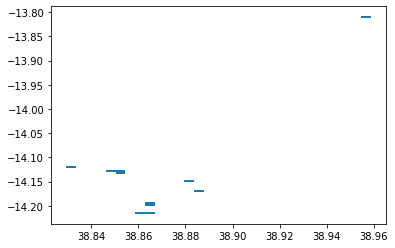

2020-06-28


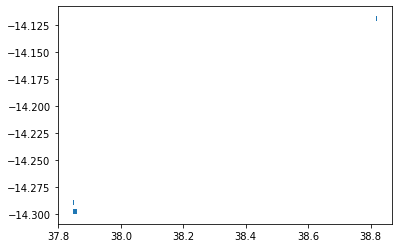

2020-06-29


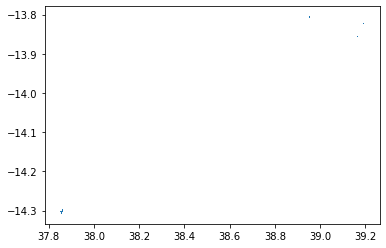

2020-06-30


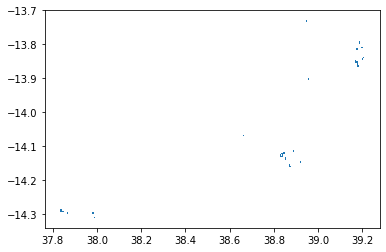

2020-07-01


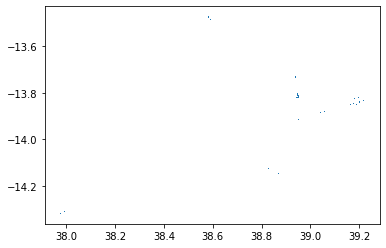

2020-07-02


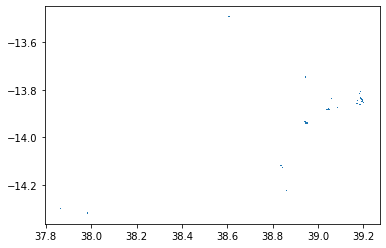

2020-07-03


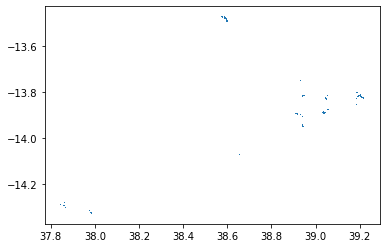

2020-07-04


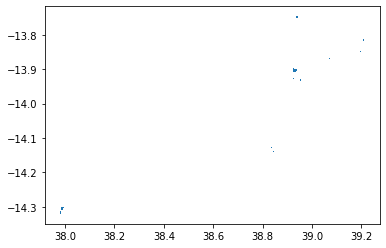

2020-07-05


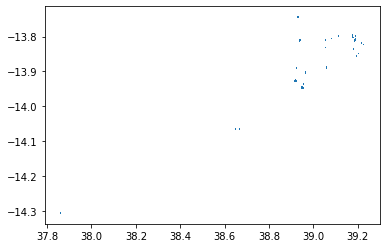

2020-07-06


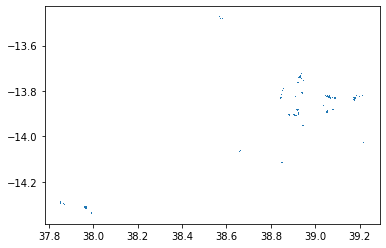

2020-07-07


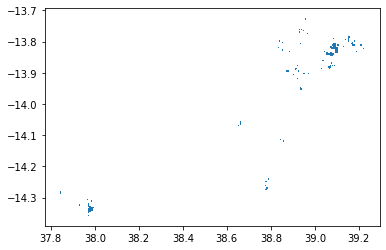

2020-07-08


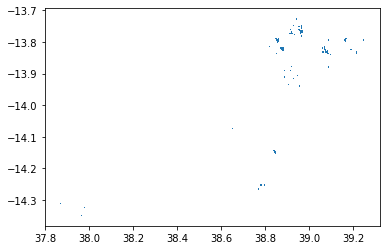

2020-07-09


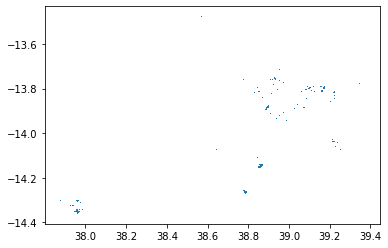

2020-07-10


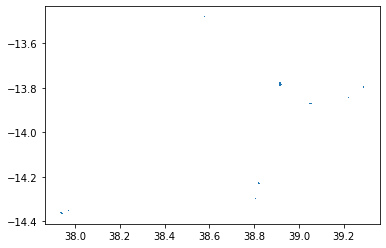

2020-07-11


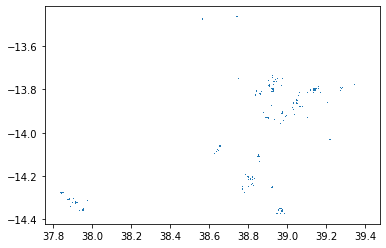

2020-07-12


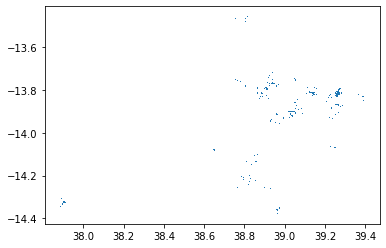

2020-07-13


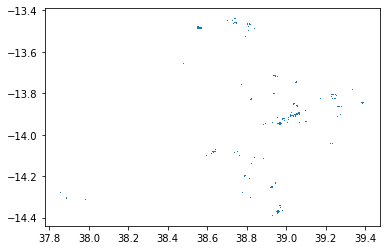

2020-07-14


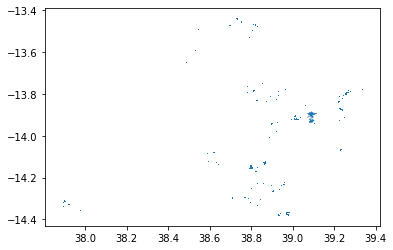

2020-07-15


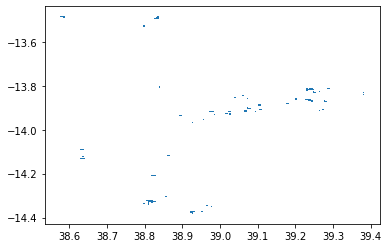

2020-07-16


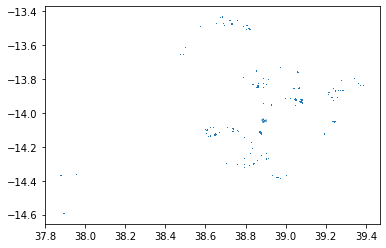

2020-07-17


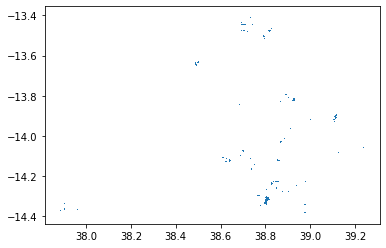

2020-07-18


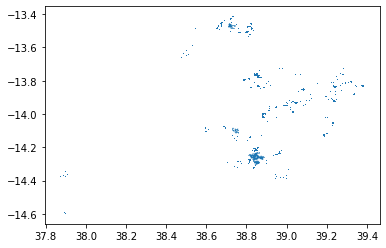

2020-07-19


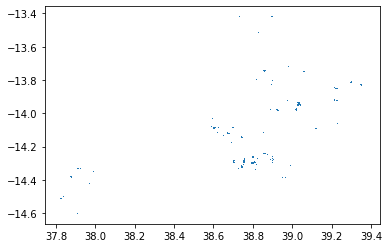

2020-07-20


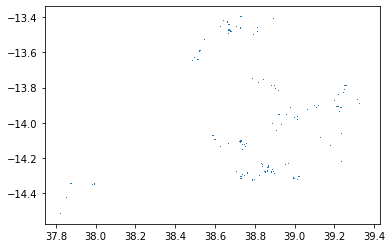

2020-07-21


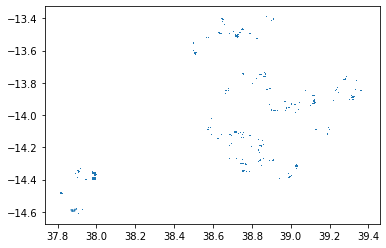

2020-07-22


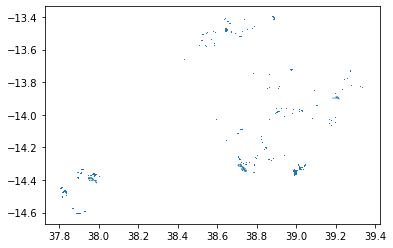

2020-07-23


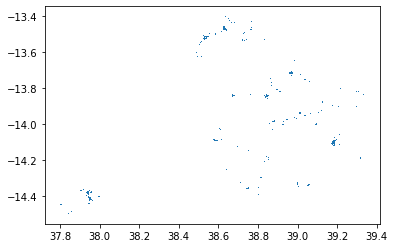

2020-07-24


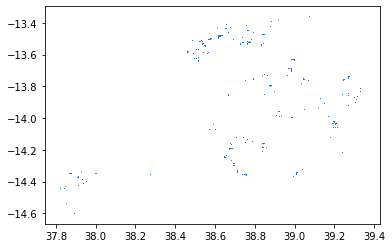

2020-07-25


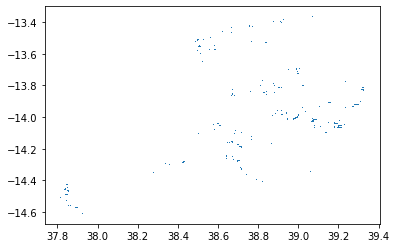

2020-07-26


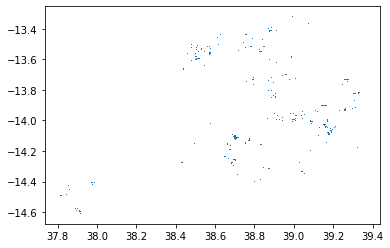

2020-07-27


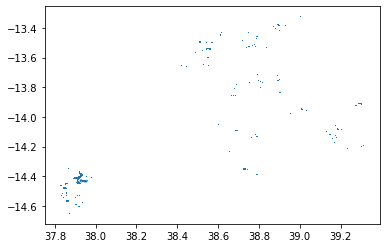

2020-07-28


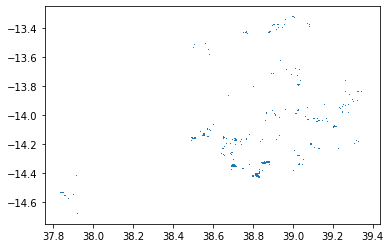

2020-07-29


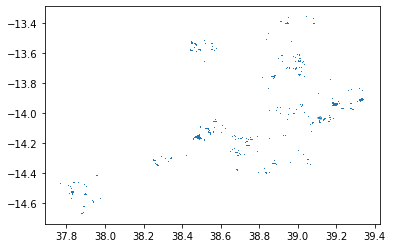

2020-07-30


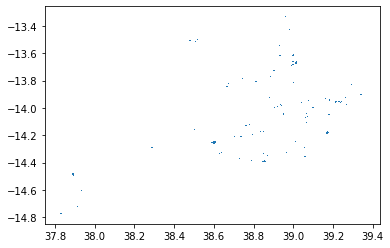

2020-07-31


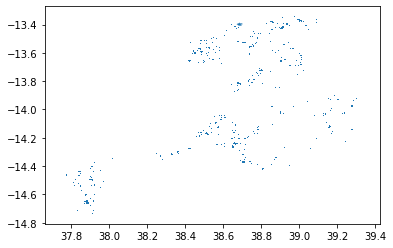

2020-08-01


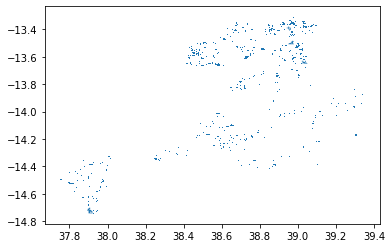

2020-08-02


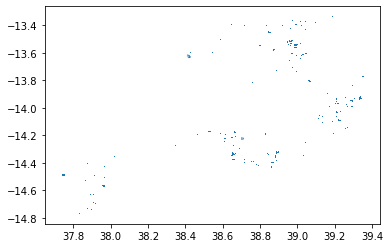

2020-08-03


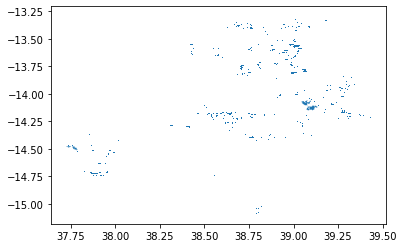

2020-08-04


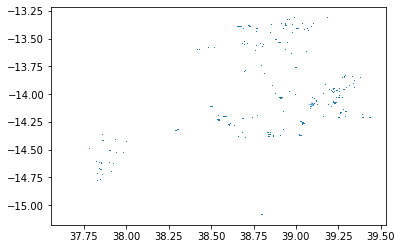

2020-08-05


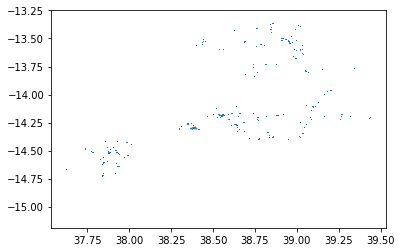

2020-08-06


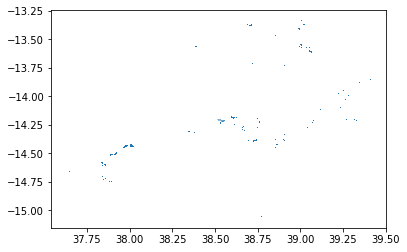

2020-08-07


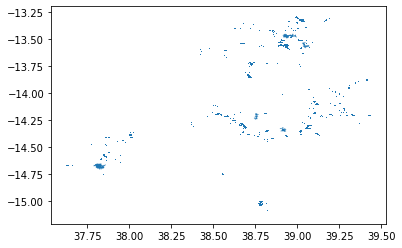

2020-08-08


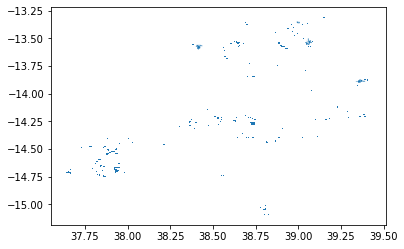

2020-08-09


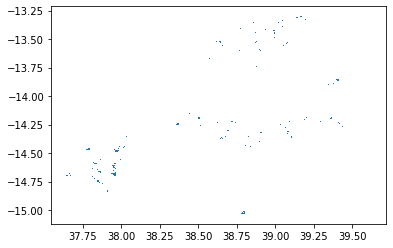

2020-08-10


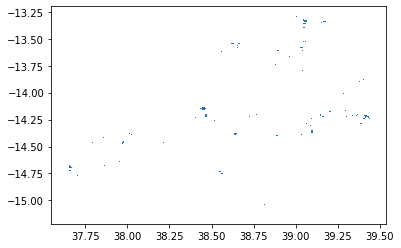

2020-08-11


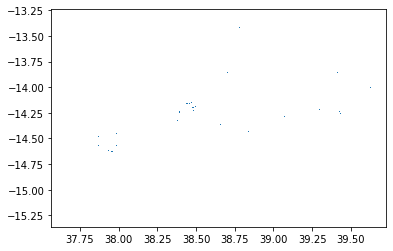

2020-08-12


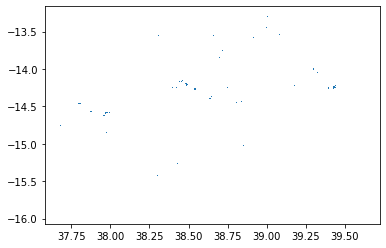

2020-08-13


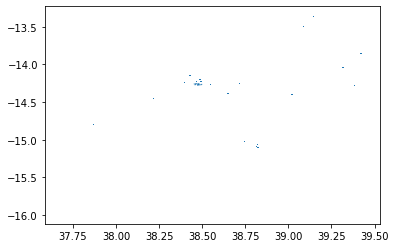

2020-08-14


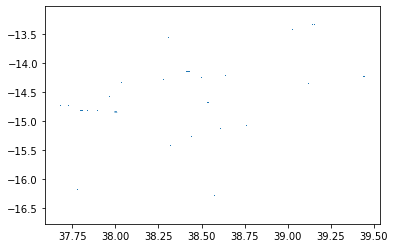

2020-08-15


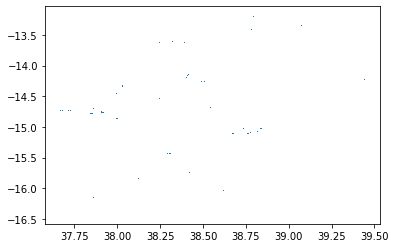

2020-08-16


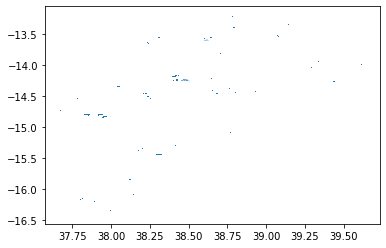

2020-08-17


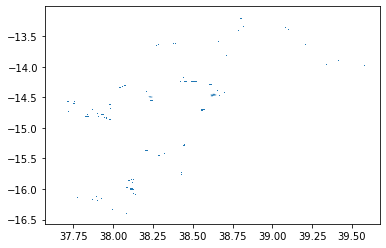

2020-08-18


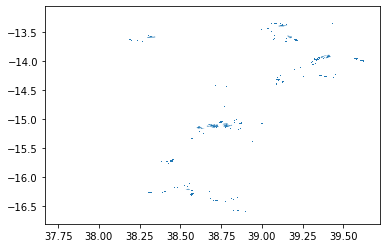

2020-08-19


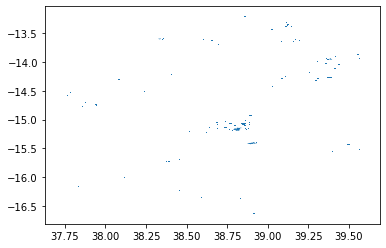

2020-08-20


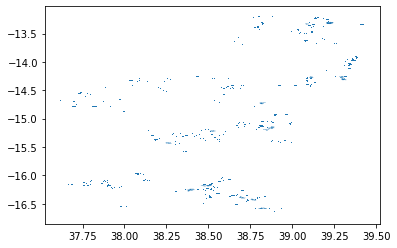

2020-08-21


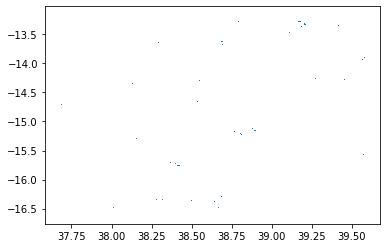

2020-08-22


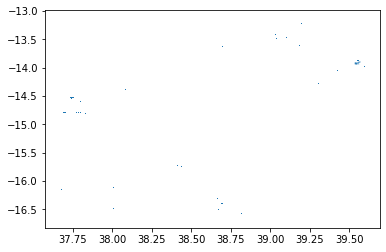

2020-08-23


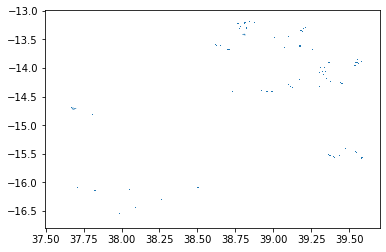

2020-08-24


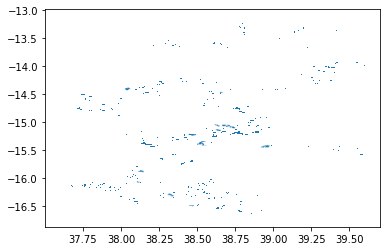

2020-08-25


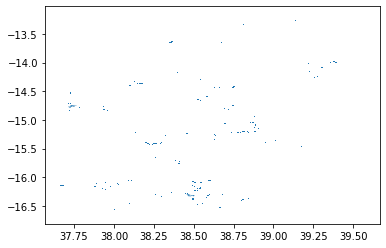

2020-08-26


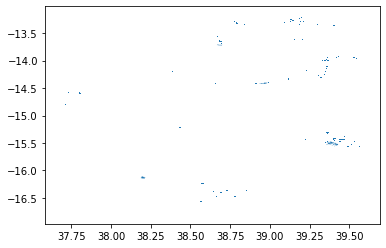

2020-08-27


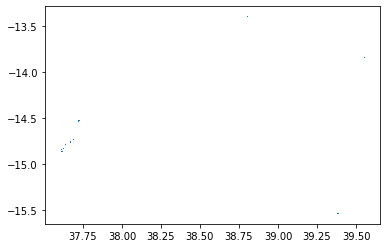

2020-08-28


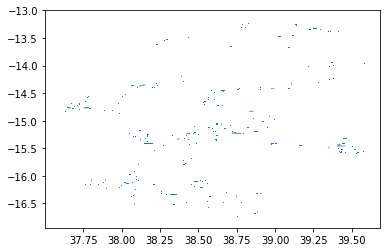

2020-08-29


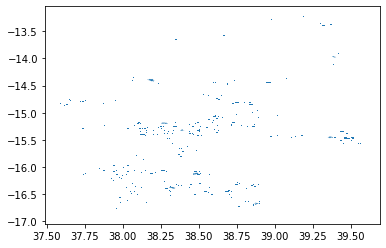

2020-08-30


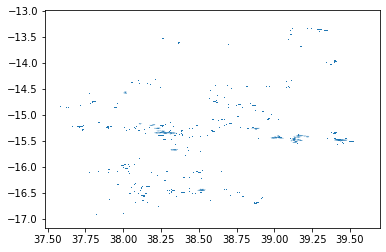

2020-08-31


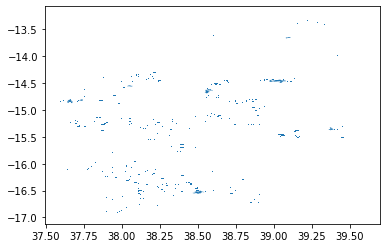

2020-09-01


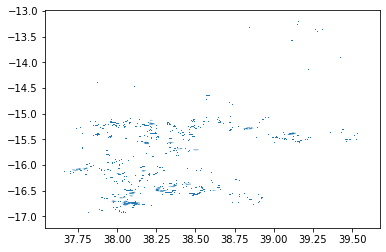

2020-09-02


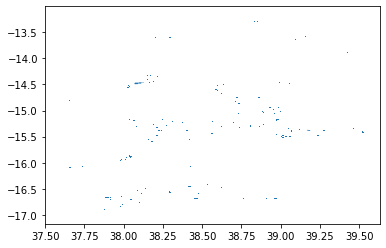

2020-09-03


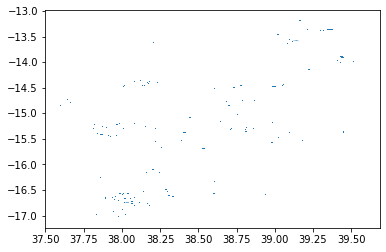

2020-09-04


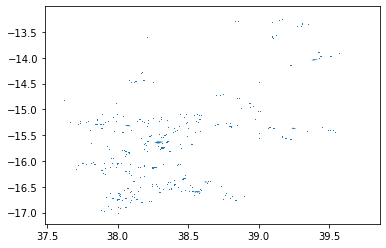

2020-09-05


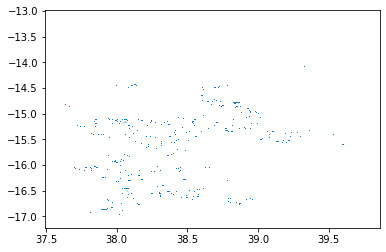

2020-09-06


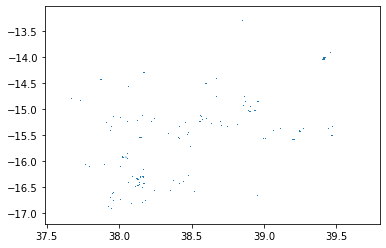

2020-09-07


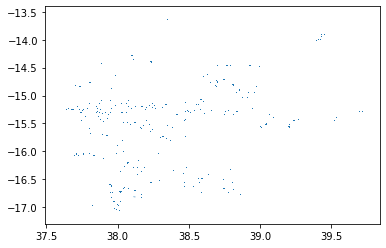

2020-09-08


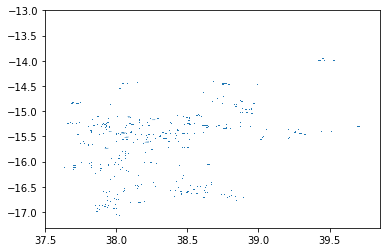

2020-09-09


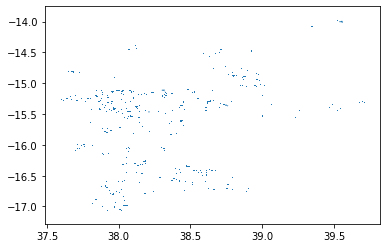

2020-09-10


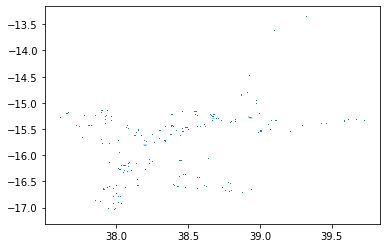

2020-09-11


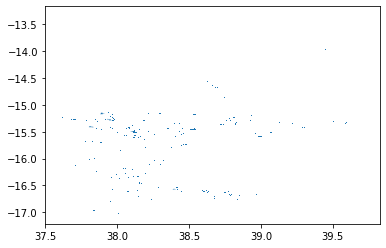

2020-09-12


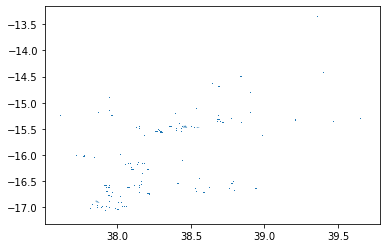

2020-09-13


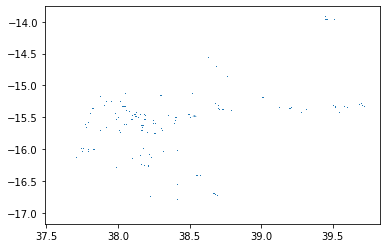

2020-09-14


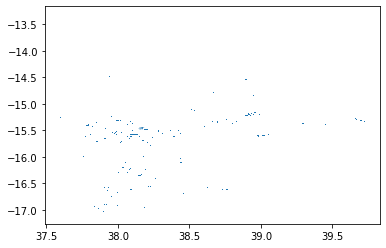

2020-09-15


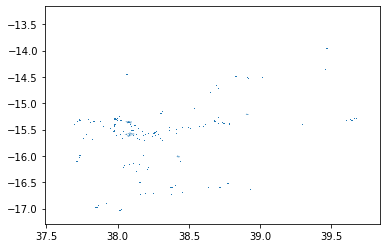

2020-09-16


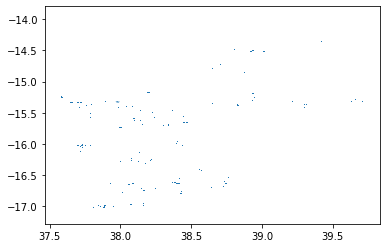

2020-09-17


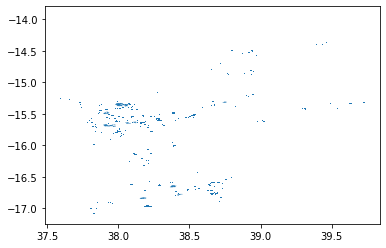

2020-09-18


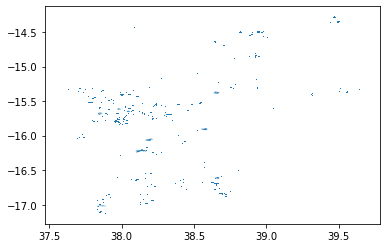

2020-09-19


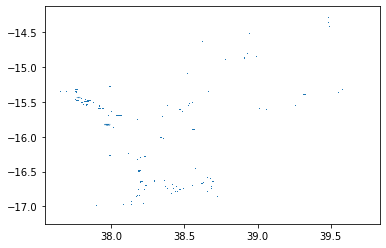

2020-09-20


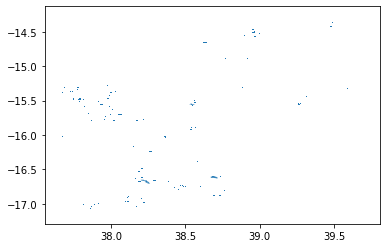

2020-09-21


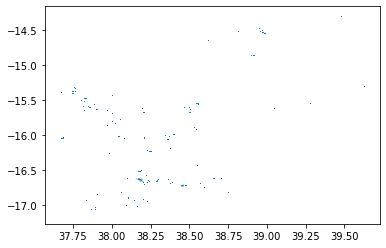

2020-09-22


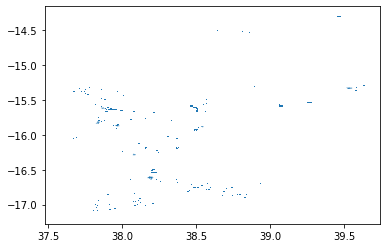

2020-09-23


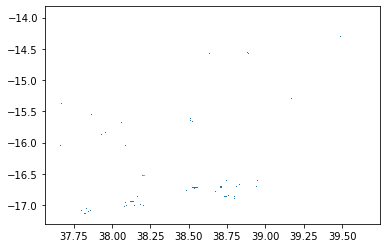

2020-09-24


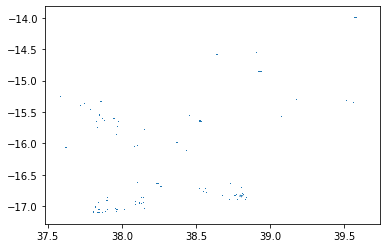

2020-09-25


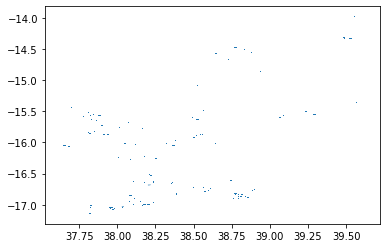

2020-09-26


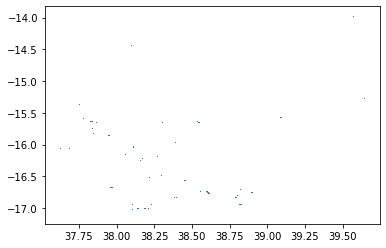

2020-09-27


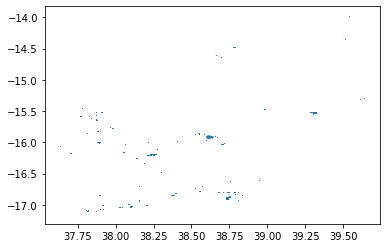

2020-09-28


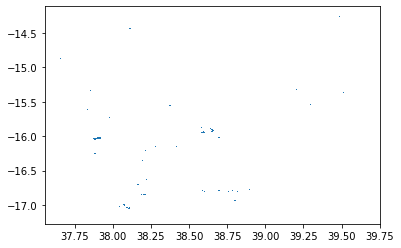

2020-09-29


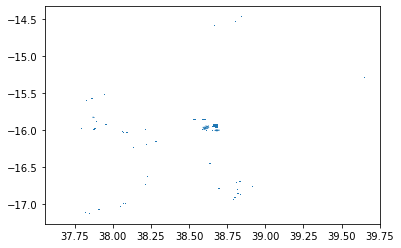

2020-09-30


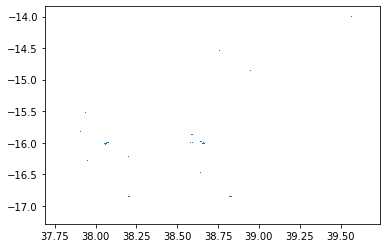

2020-10-01


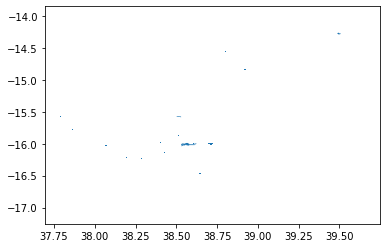

2020-10-02


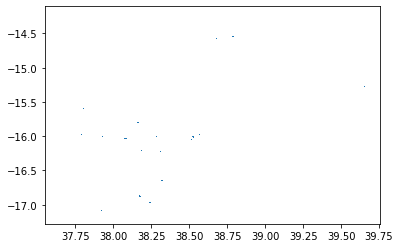

2020-10-03


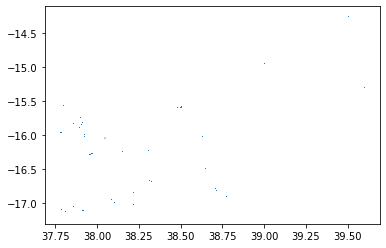

2020-10-04


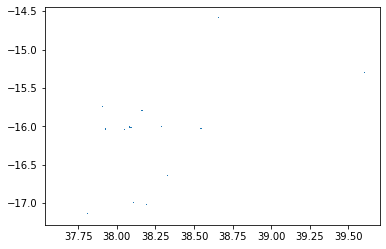

2020-10-05


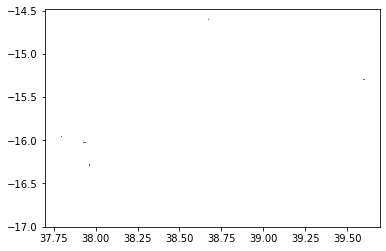

2020-10-06


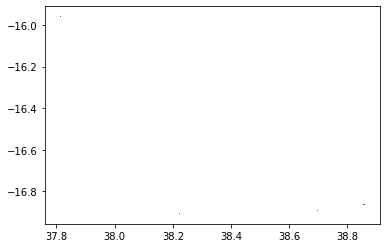

2020-10-07


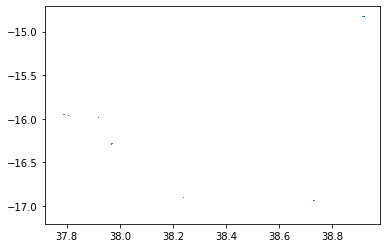

2020-10-08


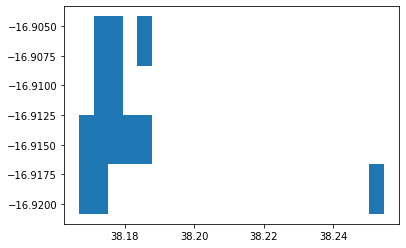

2020-10-09


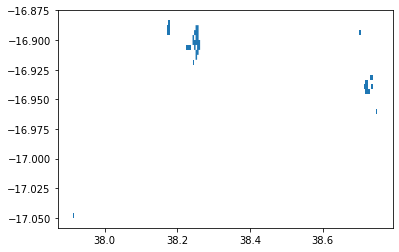

2020-10-10


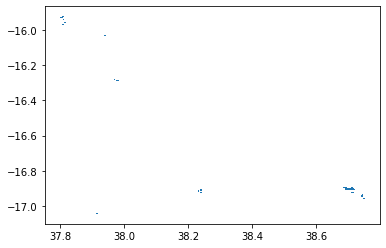

2020-10-11


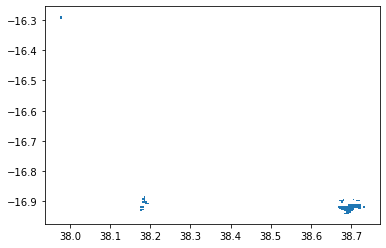

2020-10-12


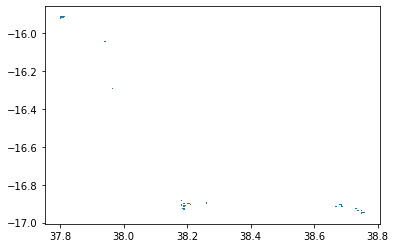

2020-10-13


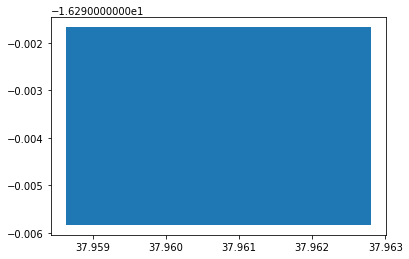

2020-10-14


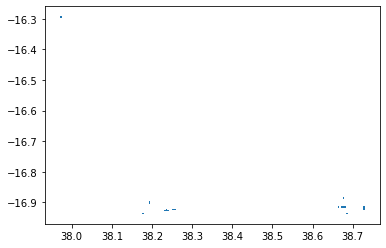

2020-10-15


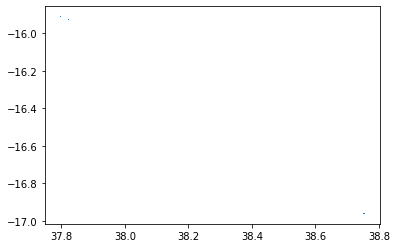

2020-10-16


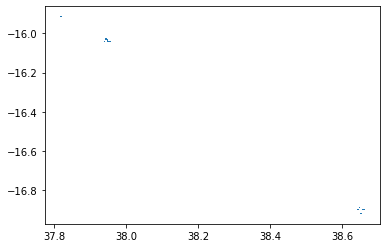

2020-10-17


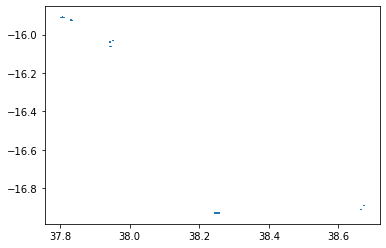

2020-10-18


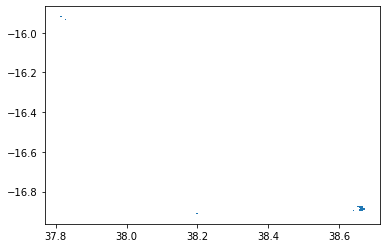

2020-10-19


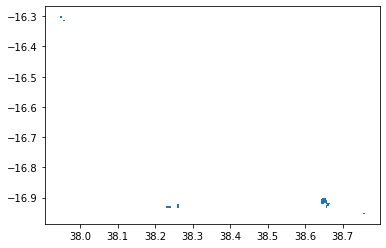

2020-10-20


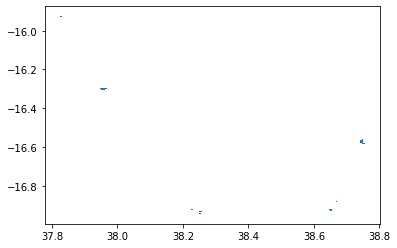

2020-10-21


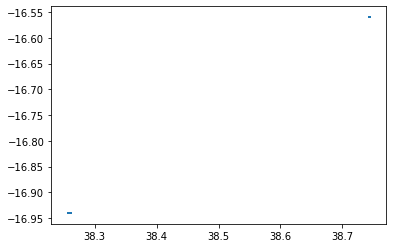

2020-10-22


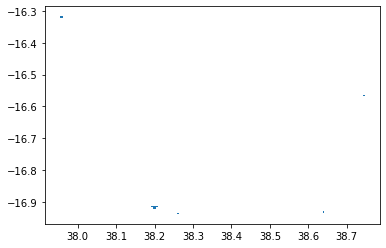

2020-10-23


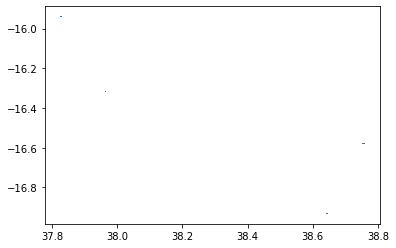

2020-10-24


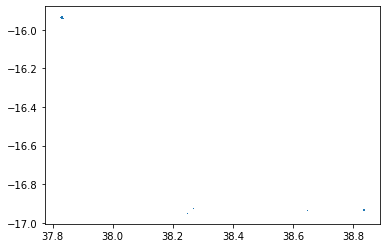

2020-10-25


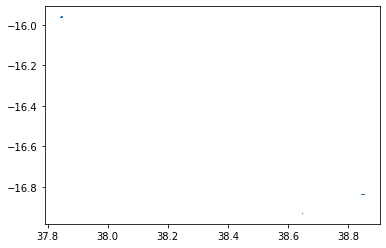

2020-10-26


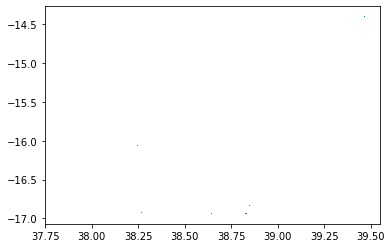

2020-10-27


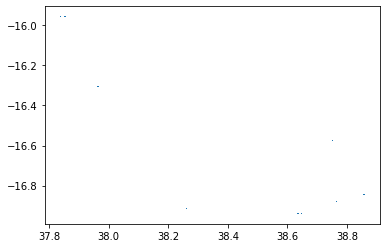

2020-10-28


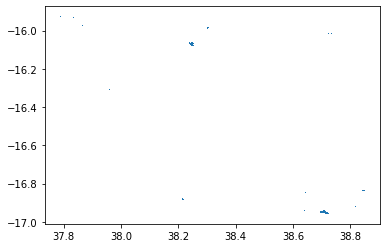

2020-10-29


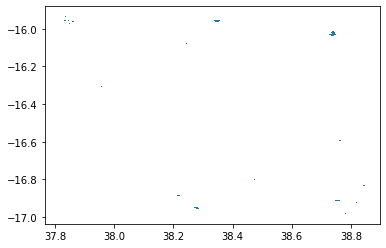

2020-10-30


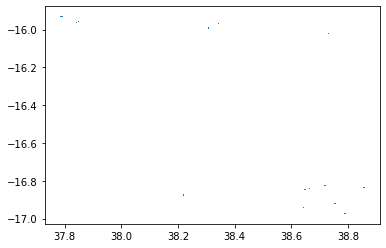

2020-10-31


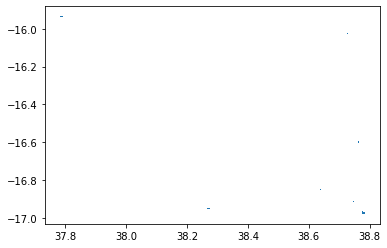

2020-11-01


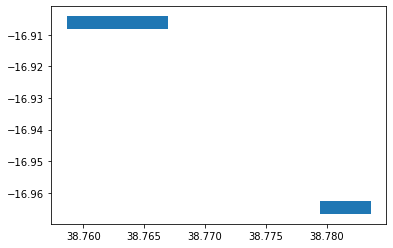

2020-11-02


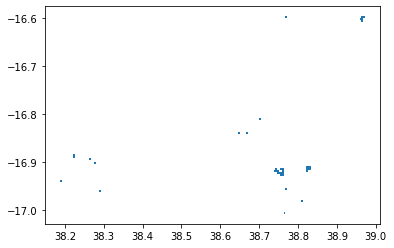

2020-11-03


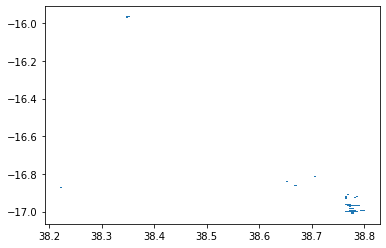

2020-11-04


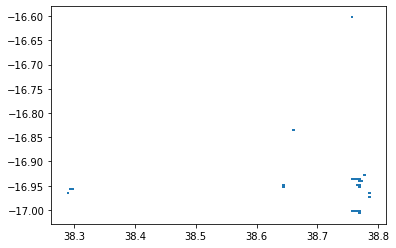

2020-11-05


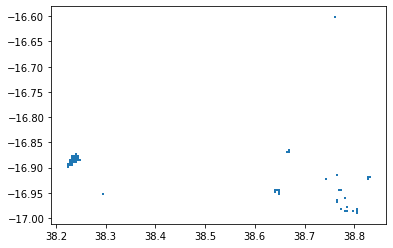

2020-11-06


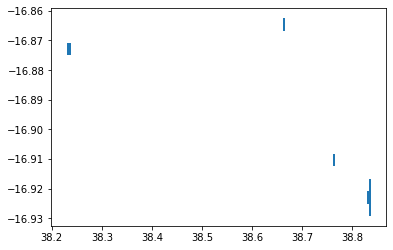

2020-11-07


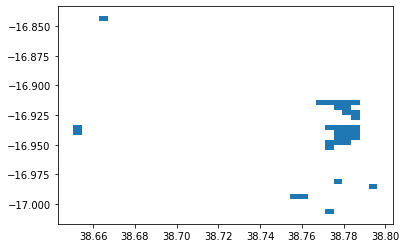

2020-11-08


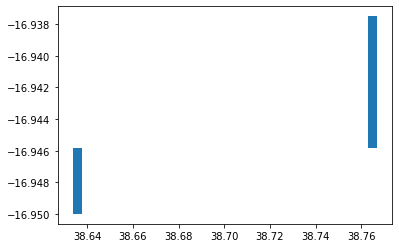

2020-11-09
2020-11-10
2020-11-11


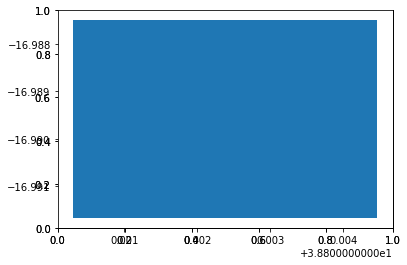

2020-11-12


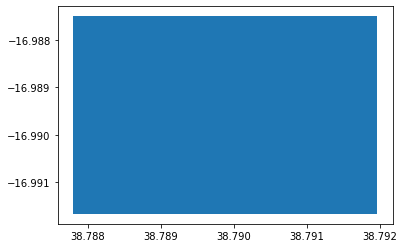

2020-11-13
2020-11-15
2020-11-16


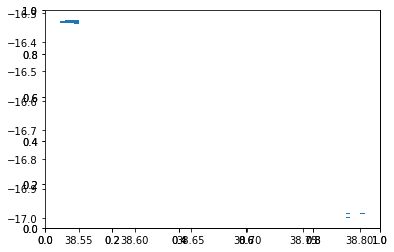

2020-11-17
2020-11-18


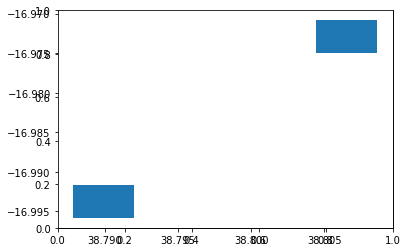

2020-11-20


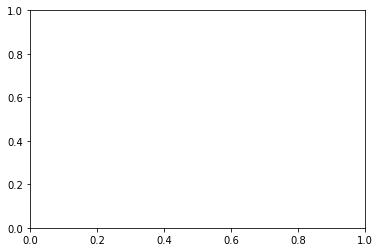

In [14]:
# Detailing the day to day progression of a fire
# It looks like some dates have better data than others, which is interesting. General trends look okay though for a first go around! 
lastFDate = None
min_max_day = [float('inf'), float('inf'), -float('inf'), -float('inf')]
day_index = 2 
polygon_all_dates = []
polygon_date_array = []
for row in ID_23423319_sorted_df.iterrows():
    feature = shapeRecords[row[0]]

    if row[1]['FDate'] == lastFDate:
        polygon_date_array.append(feature.shape.points)
        minX = min([tup[0] for tup in feature.shape.points])
        minY = min([tup[1] for tup in feature.shape.points])
        maxX = max([tup[0] for tup in feature.shape.points])
        maxY = max([tup[1] for tup in feature.shape.points])
        if minX < min_max_day[0]:
            min_max_day[0] = minX
        if minY < min_max_day[1]:
            min_max_day[1] = minY 
        if maxX > min_max_day[2]:
            min_max_day[2] = maxX
        if maxY > min_max_day[3]:
            min_max_day[3] = maxY
        
    else:
        fig = plt.figure(day_index)
        ax = fig.add_subplot(111)
        lastFDate = row[1]['FDate']
        print(lastFDate)
        if len(polygon_date_array) == 0:
            continue
        polygon_all_dates.append([polygon_date_array])
        # Make the collection and add it to the plot.
        coll = PolyCollection(polygon_date_array, cmap=mpl.cm.jet, edgecolors='none')
        polygon_date_array = []
        ax.add_collection(coll)
        ax.autoscale_view()
        plt.show()
        day_index += 1
        min_max_day = [float('inf'), float('inf'), -float('inf'), -float('inf')]
        
        
